In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [71]:
read_csv = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates = ['Date'])

In [72]:
df = read_csv[read_csv['Date'] > '2020-03-15']
countries = ['India', 'US', 'Russia', 'Brazil', 'China']
df = df[df['Country'].isin(countries)]
df['Total_Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
colors = {'US':'#045275', 'China':'#089099', 'India':'#7CCBA2', 'Russia':'#FCDE9C', 'Brazil':'#DC3977'}
plt.style.use('fivethirtyeight')
df1 = df[['Date','Country','Confirmed','Recovered', 'Deaths']]
df1 = df1.pivot(index='Date', columns='Country', values='Confirmed')
countries_list=list(df1.columns)
# print(countries_list)
countries=list(df1.columns)
df2 = df1.reset_index('Date')
df2.set_index(['Date'], inplace=True)
df2.columns = countries

# Number of Confirmed Cases since 15th March 2020 of 5 countries: China, India, US, Russia, Brazil

Text(0, 0.5, 'No. of confirmed cases')

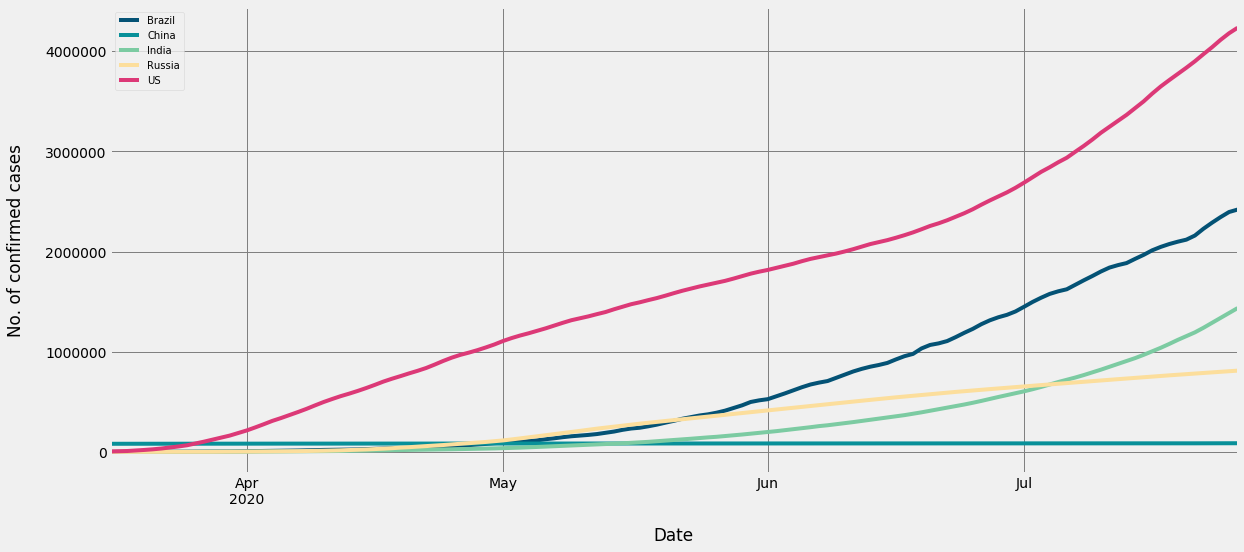

In [73]:
df2.plot(figsize=(18,8), color=list(colors.values()), legend=True)
# plt.yaxis.set_major_formatter(tick.StrMethodFormatter('{y:,.0f}'))
plt.legend(loc=2, prop={'size': 10})
plt.grid(color='gray')
plt.xlabel('Date', labelpad=20)
plt.ylabel('No. of confirmed cases', labelpad=20)

# India Death Rate

Text(0, 0.5, 'Total Deaths')

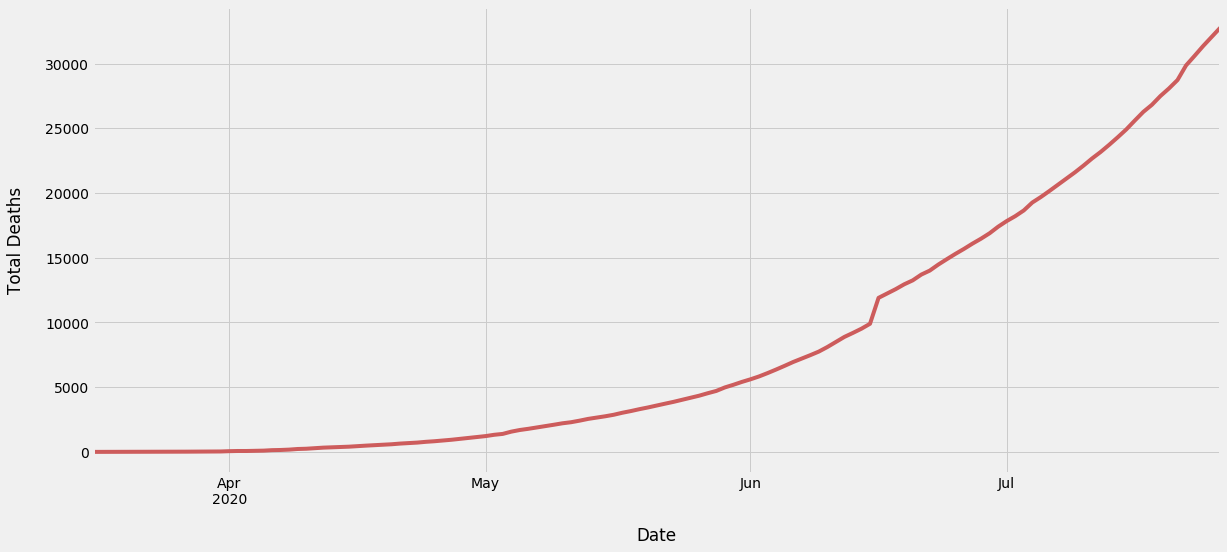

In [74]:
death_rate = df[['Date','Country','Deaths']]
death_rate=death_rate[death_rate['Country']=='India']
death_rate.plot(figsize=(18,8),x='Date', y='Deaths', kind='line', color='indianred', legend=False)
plt.xlabel('Date', labelpad=20)
plt.ylabel('Total Deaths', labelpad=20)

 # India recovery rate date wise

Text(0, 0.5, 'Count')

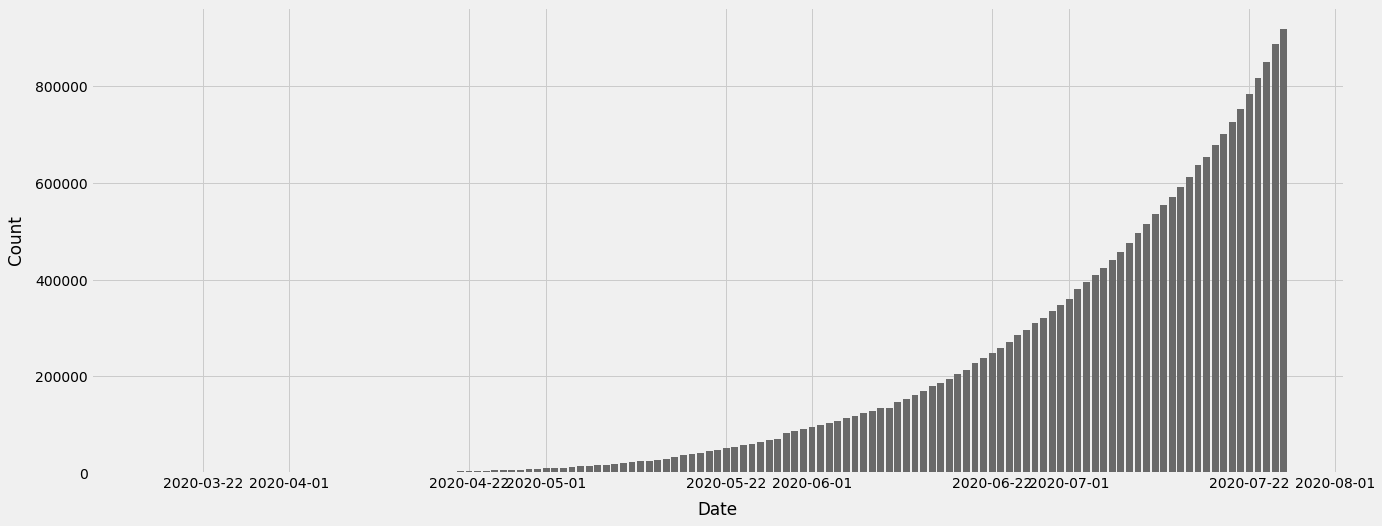

In [75]:
recovery_rate = df[['Date','Country','Recovered']]
recovery_rate = recovery_rate[df['Country']=='India']

r_date=list(recovery_rate['Date'])
r_count = list(recovery_rate['Recovered'])
fig, ax = plt.subplots(figsize=(20,8))
plt.bar(r_date, r_count, color='dimgray')
plt.xlabel('Date', labelpad=10)
plt.ylabel('Count', labelpad=10)

# India Recovery vs Death rate

Text(0, 0.5, 'Total Count')

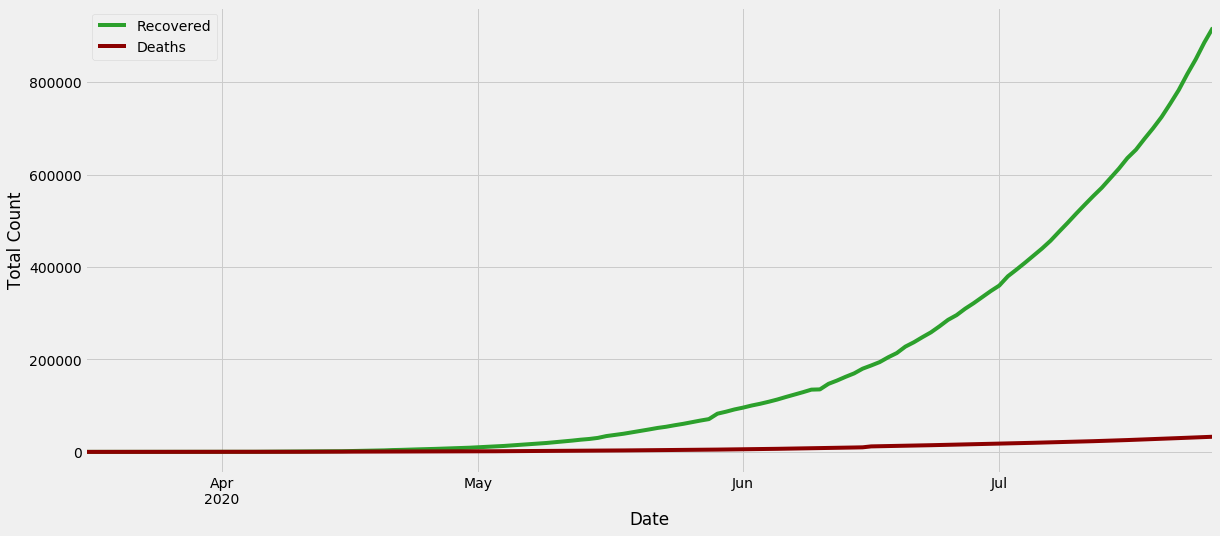

In [76]:
rec_death = df[['Date','Country','Recovered','Deaths']]
rec_death = rec_death[rec_death['Country']=='India']

colors = ['tab:green', 'darkred']
rec_death.plot(figsize=(18,8),x='Date', y=['Recovered', 'Deaths'], kind='line', color=colors)
plt.xlabel('Date')
plt.ylabel('Total Count')

Text(0, 0.5, 'Daily New Cases')

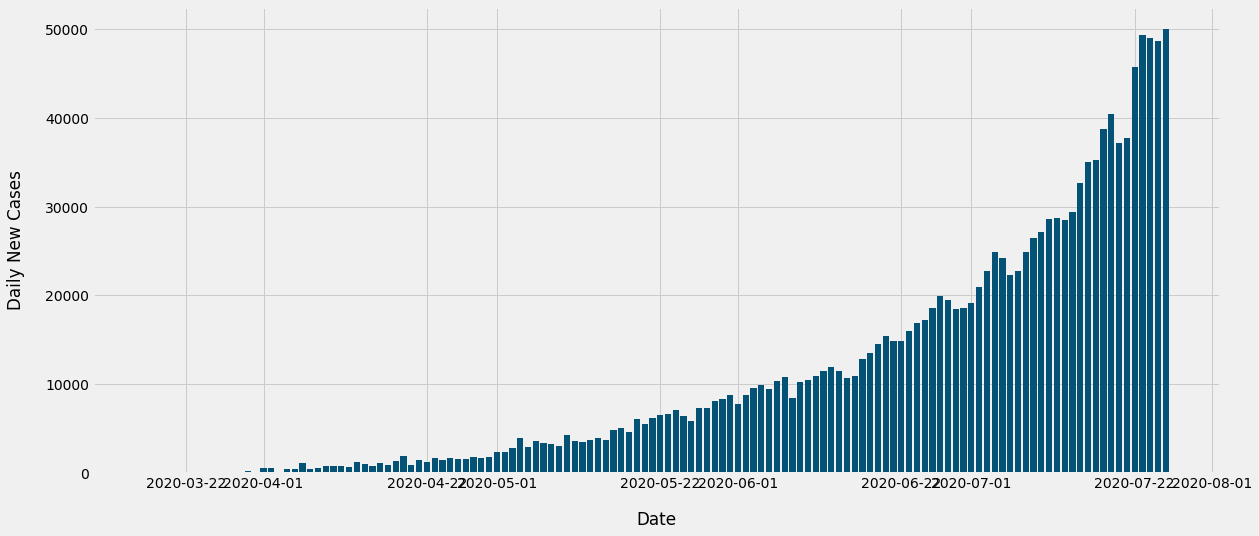

In [77]:
daily_cases = df[['Date', 'Country', 'Confirmed']]
daily_cases = daily_cases[daily_cases['Country'] == 'India']
daily_cases['Daily_New_Cases'] = daily_cases['Confirmed'].diff()

cases_date=list(daily_cases['Date'])
cases_count = list(daily_cases['Daily_New_Cases'])
fig, ax = plt.subplots(figsize=(18,8))
plt.bar(cases_date,cases_count,color='#045275')
plt.xlabel('Date', labelpad=20)
plt.ylabel('Daily New Cases', labelpad=20)

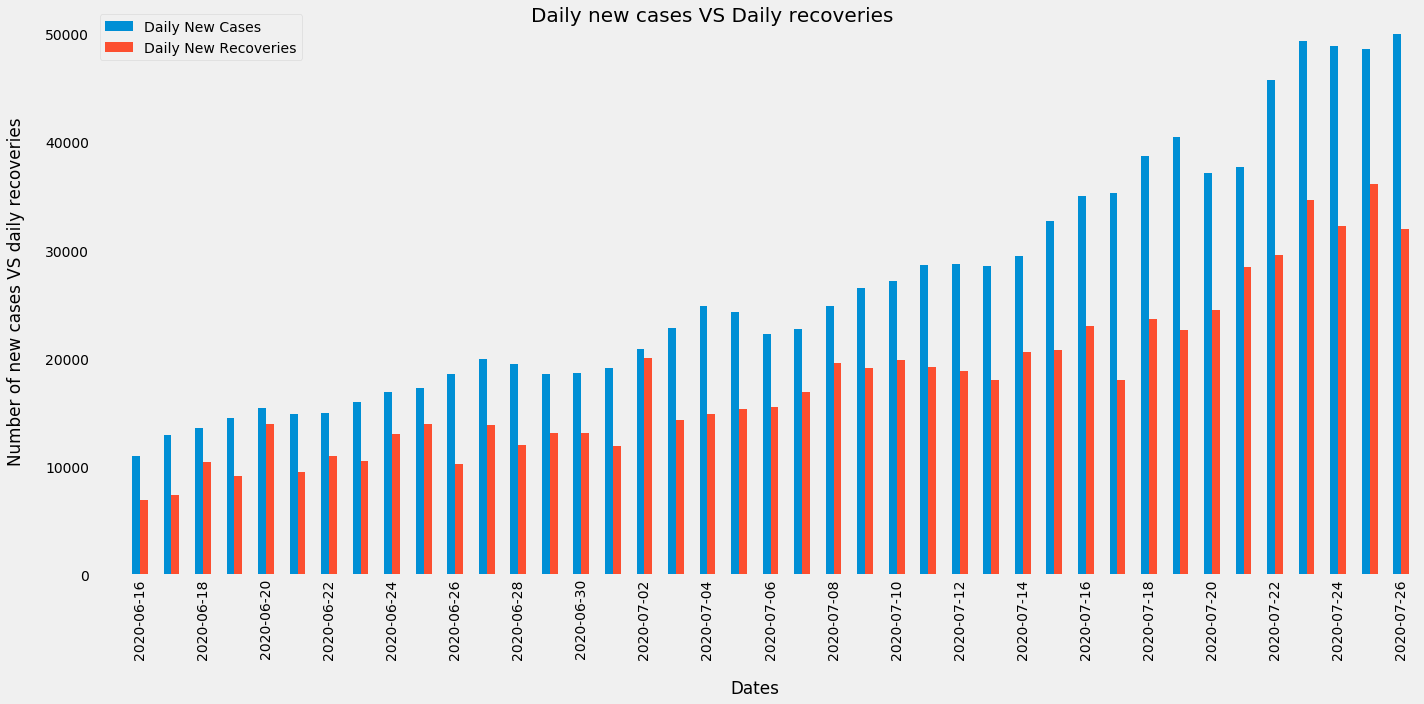

In [78]:
daily_recvrd = df[['Date', 'Country', 'Recovered']]
daily_recvrd = daily_recvrd[daily_recvrd['Date'] >= '2020-06-15']
daily_recvrd = daily_recvrd[daily_recvrd['Country'] == 'India']
daily_recvrd['Daily New Recoveries'] = daily_recvrd['Recovered'].diff()
daily_recvrd = daily_recvrd.drop(['Country', 'Recovered'], 1)
daily_recvrd = daily_recvrd.reset_index(drop = True)

daily_cases = df[['Date', 'Country', 'Confirmed']]
daily_cases = daily_cases[daily_cases['Date'] >= '2020-06-15']
daily_cases = daily_cases[daily_cases['Country'] == 'India']
daily_cases['Daily New Cases'] = daily_cases['Confirmed'].diff()
daily_cases = daily_cases.drop(['Confirmed', 'Country'], 1)
daily_cases = daily_cases.reset_index(drop = True)

# combine dataframes together, turn the date column into the index
df_daily = pd.concat([daily_cases, daily_recvrd.drop(columns = 'Date')], axis=1)
df_daily['Date'] = df_daily['Date'].dt.date
df_daily.set_index('Date', inplace=True)

# make a grouped bar plot time series
ax = df_daily.plot.bar(figsize=(20,10))

# show every other tick label
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

# add titles, axis labels
plt.suptitle("Daily new cases VS Daily recoveries", fontsize = 20)
plt.xlabel("Dates", labelpad=20)
plt.ylabel("Number of new cases VS daily recoveries", labelpad=20)
plt.tight_layout()
plt.grid(b=None)

plt.show()